In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format='retina'
import collections
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['mathtext.rm'] = 'serif'
rcParams['mathtext.it'] = 'serif:italic'
rcParams['mathtext.bf'] = 'serif:bold'
rcParams['axes.titlepad'] = 12

In [2]:
fid19p0 = np.load('Run_30_bins_for_all/fidreal_19p0.npz')['func'][0]
fid19p5 = np.load('Run_30_bins_for_all/fidreal_19p5.npz')['func'][0]
fid20p0 = np.load('Run_30_bins_for_all/fidreal_20p0.npz')['func'][0]
fid20p5 = np.load('Run_30_bins_for_all/fidreal_20p5.npz')['func'][0]
fid21p0 = np.load('Run_30_bins_for_all/fidreal_21p0.npz')['func'][0]

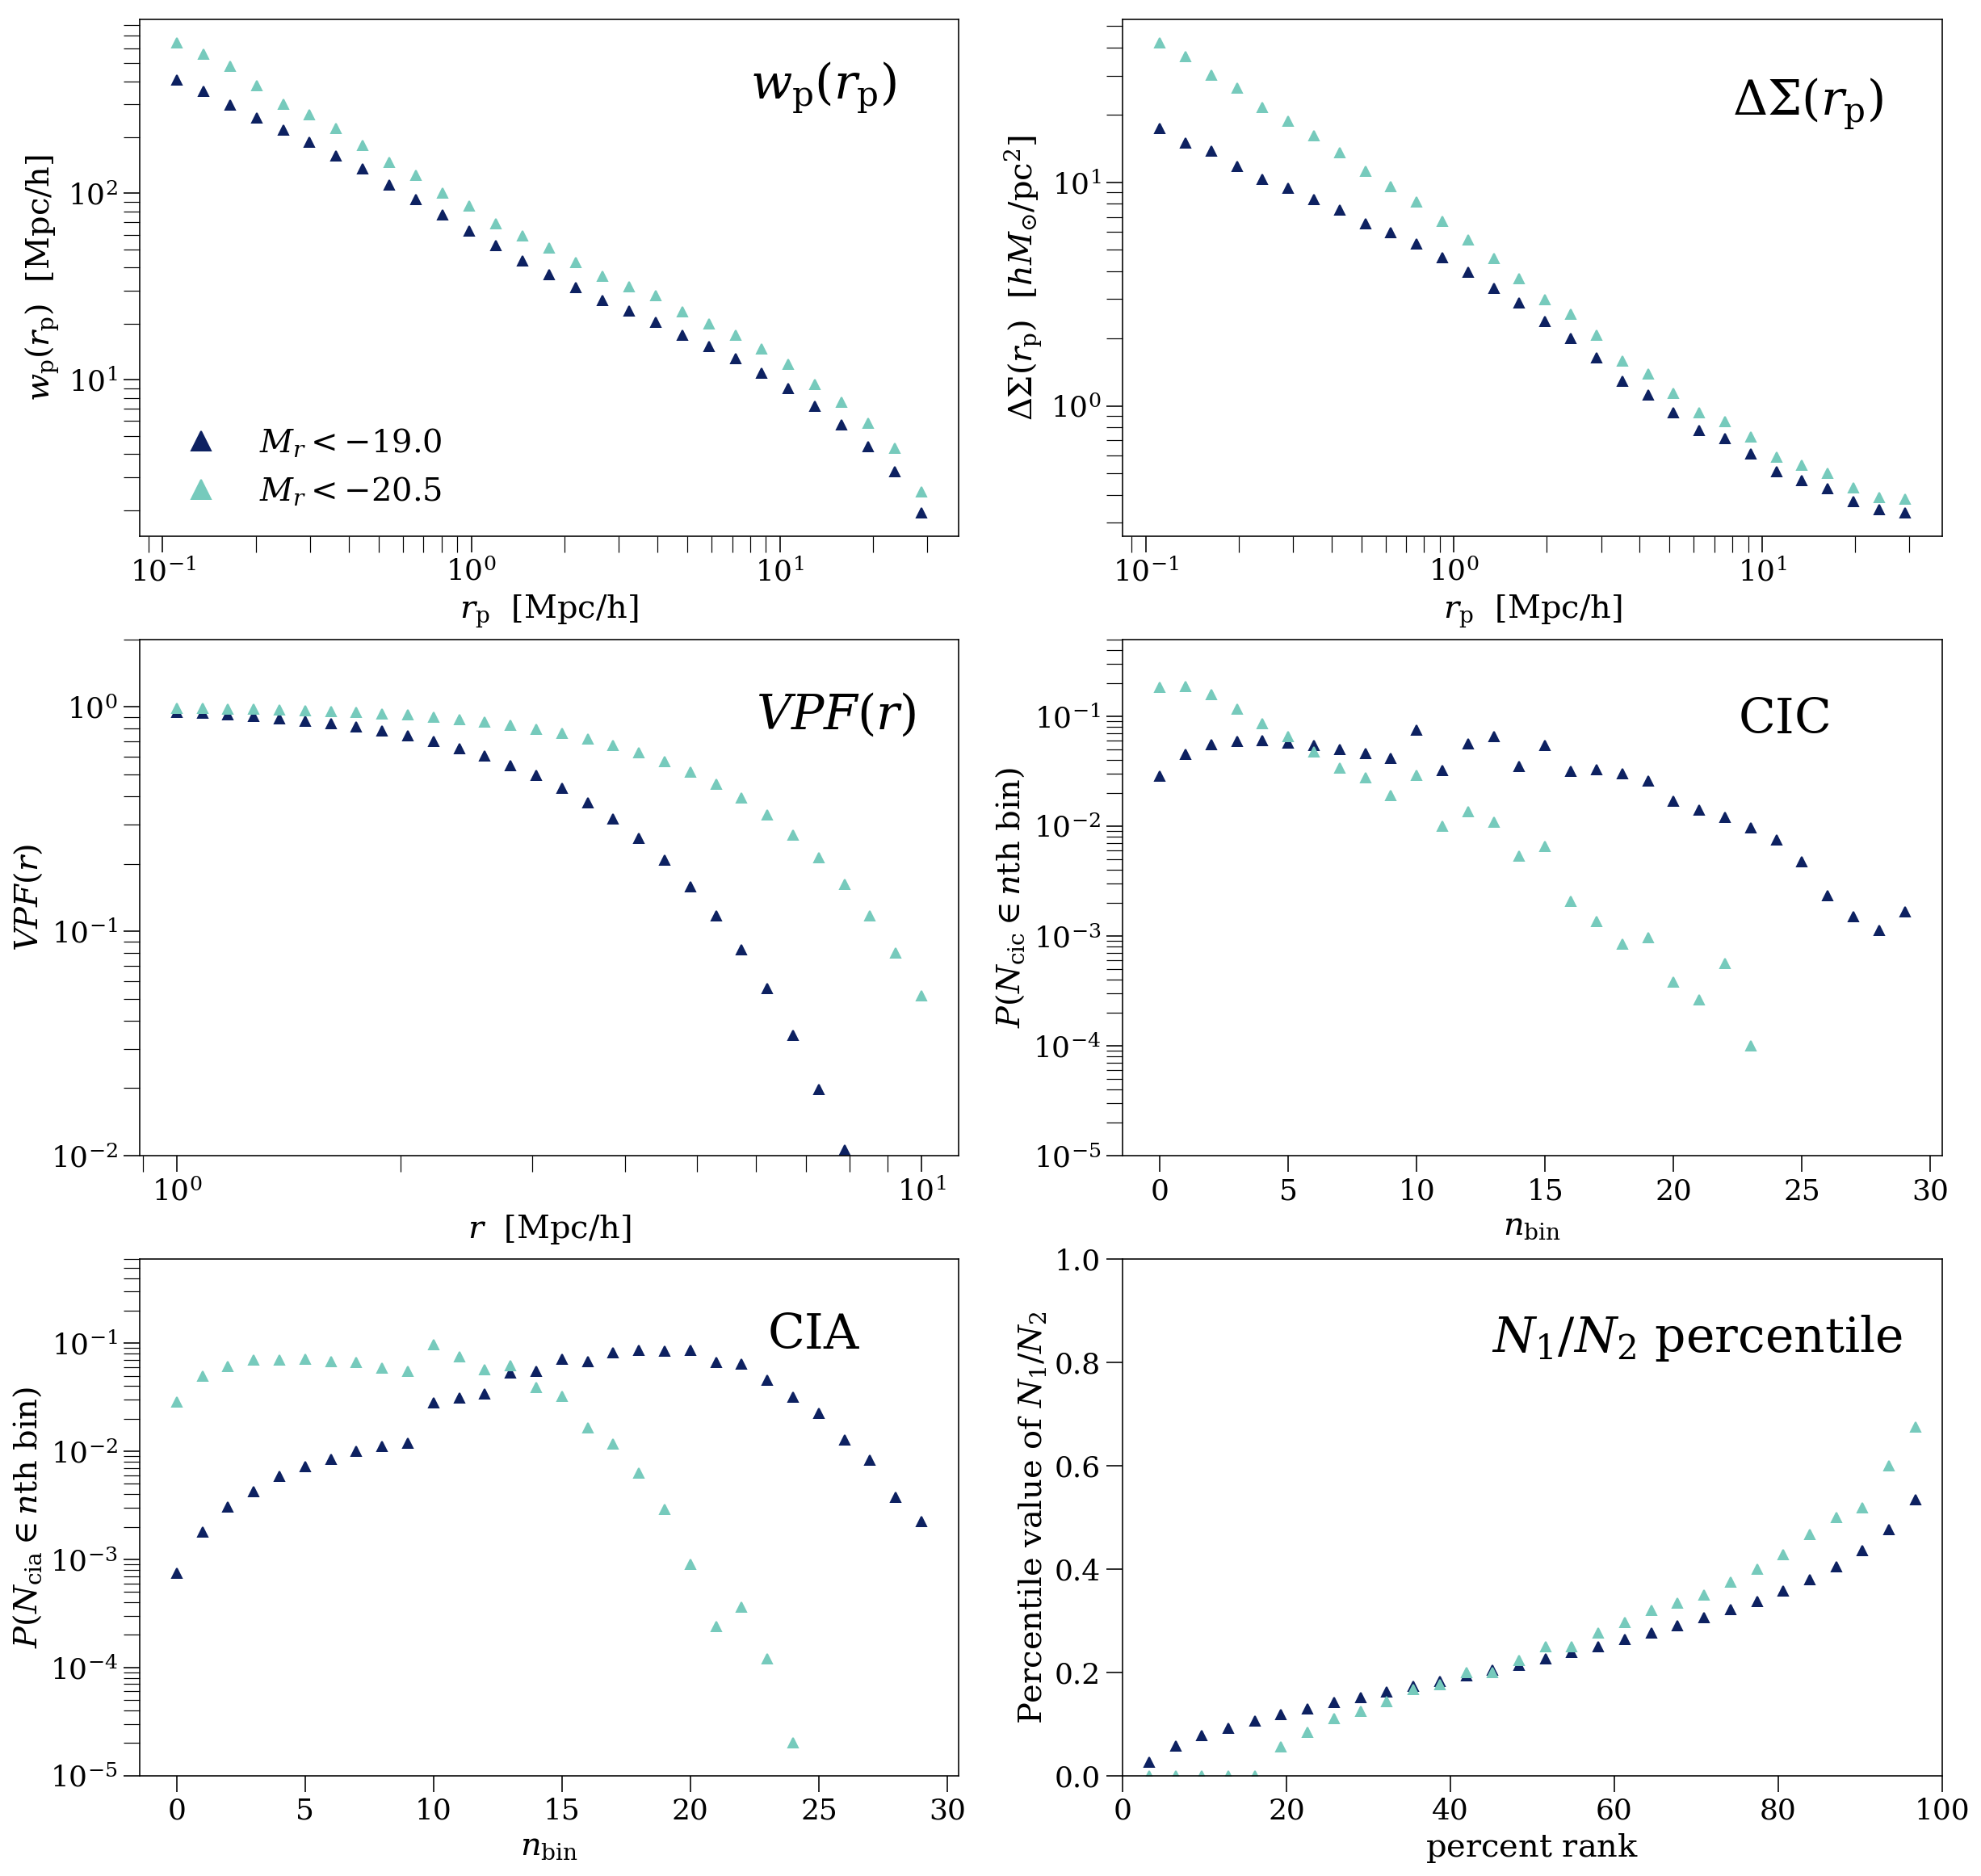

In [10]:
r_wp = np.logspace(-1,1.5,30)
r_wp = (r_wp[1:]+r_wp[:-1])/2.

r_ds = np.logspace(-1,1.5,31)
r_ds = np.sqrt(0.5*(r_ds[1:]**2 + r_ds[:-1]**2))

r_vpf = np.logspace(0,1,30)

#np.concatenate([np.arange(10),np.around(np.logspace(1,np.log10(150),30-10)).astype(np.int)])
#np.concatenate([np.arange(10),np.around(np.logspace(1,np.log10(200),30-10)).astype(np.int)])

q_ratio = np.linspace(0,1,30+2)[1:-1]*100.

plt.subplots(3,2,squeeze=0,figsize=(20,20))
plt.subplot(321)
plt.plot(r_wp,fid19p0[1:30],'^',c=cm.YlGnBu(250),label=r'$M_{\it{r}}<-19.0$')
plt.plot(r_wp,fid20p5[1:30],'^',c=cm.YlGnBu(100),label=r'$M_{\it{r}}<-20.5$')
plt.legend(frameon=False,fontsize=20,loc=3,markerscale=2)
plt.xlabel(r'$r_\mathrm{p}$  $\mathrm{[Mpc/h]}$',fontsize=20)
plt.ylabel(r'$w_\mathrm{p}(r_\mathrm{p})$  $\mathrm{[Mpc/h]}$',fontsize=20)
plt.loglog()
plt.tick_params(which=u'both',labelsize=18,length=10)
plt.text(8,320,r'$w_\mathrm{p}(r_\mathrm{p})$',fontsize=30)
plt.subplot(322)
plt.plot(r_ds,fid19p0[30:60],'^',c=cm.YlGnBu(250))
plt.plot(r_ds,fid20p5[30:60],'^',c=cm.YlGnBu(100))
plt.xlabel(r'$r_\mathrm{p}$  $\mathrm{[Mpc/h]}$',fontsize=20)
plt.ylabel(r'$\Delta\Sigma(r_\mathrm{p})$  $[h M_{\odot} / {\rm pc}^2]$',fontsize=20)
plt.loglog()
plt.tick_params(which=u'both',labelsize=18,length=10)
plt.text(8,20,r'$\Delta\Sigma(r_\mathrm{p})$',fontsize=30)
plt.subplot(323)
plt.plot(r_vpf,fid19p0[60:90],'^',c=cm.YlGnBu(250))
plt.plot(r_vpf,fid20p5[60:90],'^',c=cm.YlGnBu(100))
plt.ylim((1e-2,2))
plt.xlabel(r'$r$  $\mathrm{[Mpc/h]}$',fontsize=20)
plt.ylabel(r'$VPF(r)$',fontsize=20)
plt.loglog()
plt.tick_params(which=u'both',labelsize=18,length=10)
plt.text(6,0.8,r'$VPF(r)$',fontsize=30)
plt.subplot(324)
plt.plot(range(30),fid19p0[90:120],'^',c=cm.YlGnBu(250))
plt.plot(range(30),fid20p5[90:120],'^',c=cm.YlGnBu(100))
plt.xlabel(r'$\it{n}_{\rm{bin}}$',fontsize=20)
plt.ylabel(r'$P(N_{\rm{cic}}\in \it{n}\rm{th}$ $\rm{bin})$',fontsize=20)
plt.ylim((1e-5,0.5))
plt.semilogy()
plt.tick_params(which=u'both',labelsize=18,length=10)
plt.text(22.5,0.07,r'$\rm{CIC}$',fontsize=30)
plt.subplot(325)
plt.plot(range(30),fid19p0[120:150],'^',c=cm.YlGnBu(250))
plt.plot(range(30),fid20p5[120:150],'^',c=cm.YlGnBu(100))
plt.xlabel(r'$\it{n}_{\rm{bin}}$',fontsize=20)
plt.ylabel(r'$P(N_{\rm{cia}}\in \it{n}\rm{th}$ $\rm{bin})$',fontsize=20)
plt.semilogy()
plt.tick_params(which=u'both',labelsize=18,length=10)
plt.ylim(1e-5,0.6)
plt.text(23,0.09,r'$\rm{CIA}$',fontsize=30)
plt.subplot(326)
plt.plot(q_ratio,fid19p0[150:],'^',c=cm.YlGnBu(250))
plt.plot(q_ratio,fid20p5[150:],'^',c=cm.YlGnBu(100))
plt.xlim((0,100))
plt.xlabel(r'$\rm{percent}\ \rm{rank}$',fontsize=20)
plt.ylabel(r'$\rm{Percentile}\ \rm{value}\ \rm{of}$ $N_{\mathrm{1}}/N_{\mathrm{2}}$',fontsize=20)
plt.ylim(0,1)
plt.tick_params(which=u'both',labelsize=18,length=10)
plt.text(45,0.82,r'$N_{\mathrm{1}}/N_{\mathrm{2}}\ \rm{percentile}$',fontsize=30)

In [4]:
jkcov19p0 = np.load('Run_30_bins_for_all/jk_19p0.npz')['jkcov']
realcov19p0 = np.cov(np.load('Run_30_bins_for_all/fidreal_19p0.npz')['func'].T)
jkcov19p5 = np.load('Run_30_bins_for_all/jk_19p5.npz')['jkcov']
realcov19p5 = np.cov(np.load('Run_30_bins_for_all/fidreal_19p5.npz')['func'].T)
jkcov20p0 = np.load('Run_30_bins_for_all/jk_20p0.npz')['jkcov']
realcov20p0 = np.cov(np.load('Run_30_bins_for_all/fidreal_20p0.npz')['func'].T)
jkcov20p5 = np.load('Run_30_bins_for_all/jk_20p5.npz')['jkcov']
realcov20p5 = np.cov(np.load('Run_30_bins_for_all/fidreal_20p5.npz')['func'].T)
jkcov21p0 = np.load('Run_30_bins_for_all/jk_21p0.npz')['jkcov']
realcov21p0 = np.cov(np.load('Run_30_bins_for_all/fidreal_21p0.npz')['func'].T)

[]

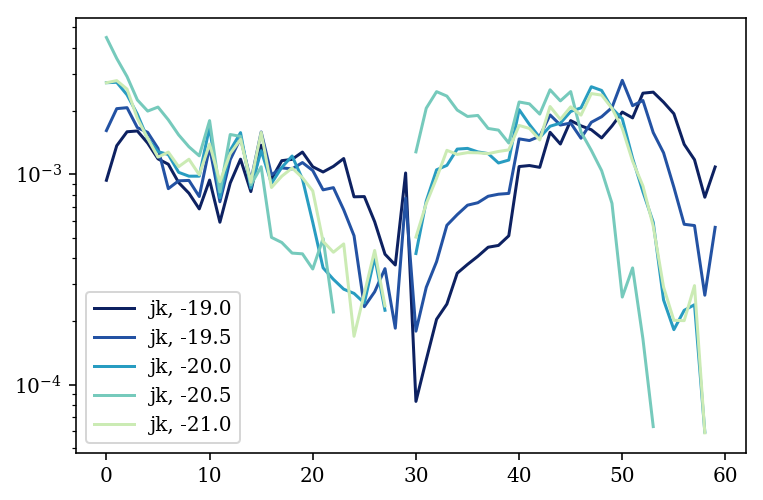

In [11]:
plt.plot(np.sqrt(jkcov19p0.diagonal()[90:150]),label='jk, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt(jkcov19p5.diagonal()[90:150]),label='jk, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt(jkcov20p0.diagonal()[90:150]),label='jk, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt(jkcov20p5.diagonal()[90:150]),label='jk, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt(jkcov21p0.diagonal()[90:150]),label='jk, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()

[]

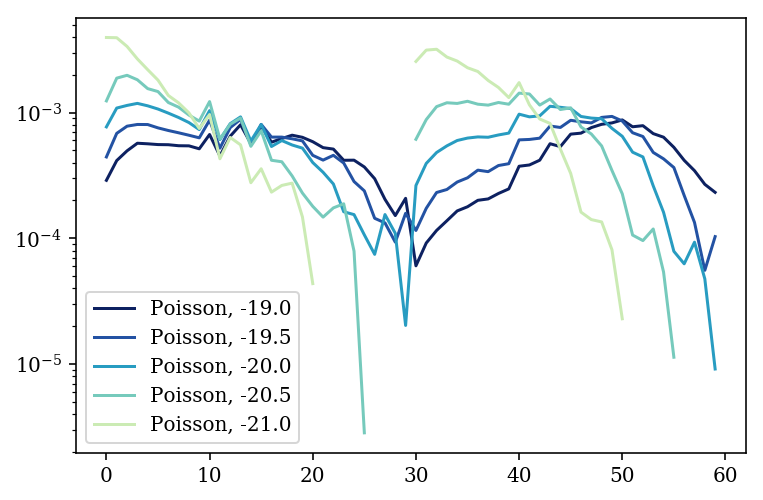

In [12]:
plt.plot(np.sqrt(realcov19p0.diagonal()[90:150]),label='Poisson, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt(realcov19p5.diagonal()[90:150]),label='Poisson, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt(realcov20p0.diagonal()[90:150]),label='Poisson, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt(realcov20p5.diagonal()[90:150]),label='Poisson, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt(realcov21p0.diagonal()[90:150]),label='Poisson, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()

[]

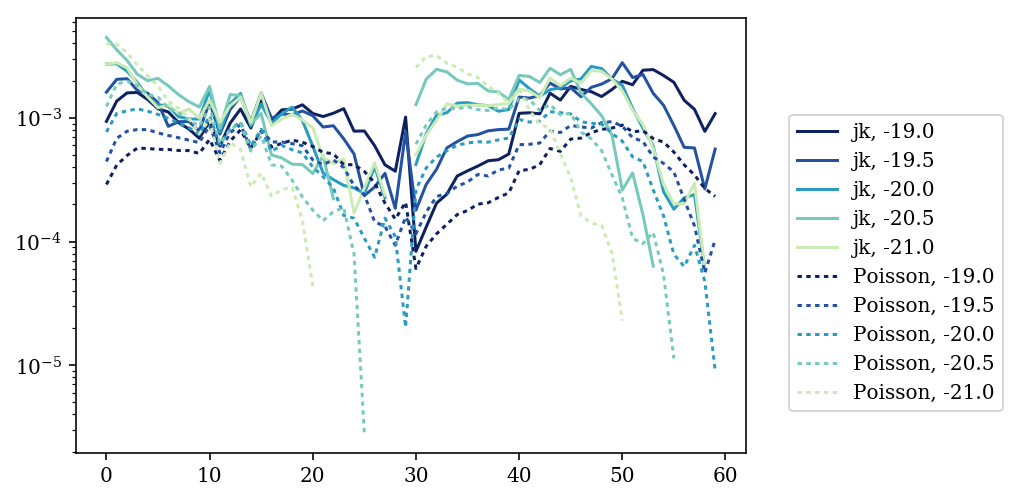

In [17]:
plt.plot(np.sqrt(jkcov19p0.diagonal()[90:150]),label='jk, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt(jkcov19p5.diagonal()[90:150]),label='jk, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt(jkcov20p0.diagonal()[90:150]),label='jk, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt(jkcov20p5.diagonal()[90:150]),label='jk, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt(jkcov21p0.diagonal()[90:150]),label='jk, -21.0',c=cm.YlGnBu(60))
plt.plot(np.sqrt(realcov19p0.diagonal()[90:150]),':',label='Poisson, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt(realcov19p5.diagonal()[90:150]),':',label='Poisson, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt(realcov20p0.diagonal()[90:150]),':',label='Poisson, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt(realcov20p5.diagonal()[90:150]),':',label='Poisson, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt(realcov21p0.diagonal()[90:150]),':',label='Poisson, -21.0',c=cm.YlGnBu(60))

plt.legend(bbox_to_anchor=(1.05,0.8))
plt.semilogy()

[]

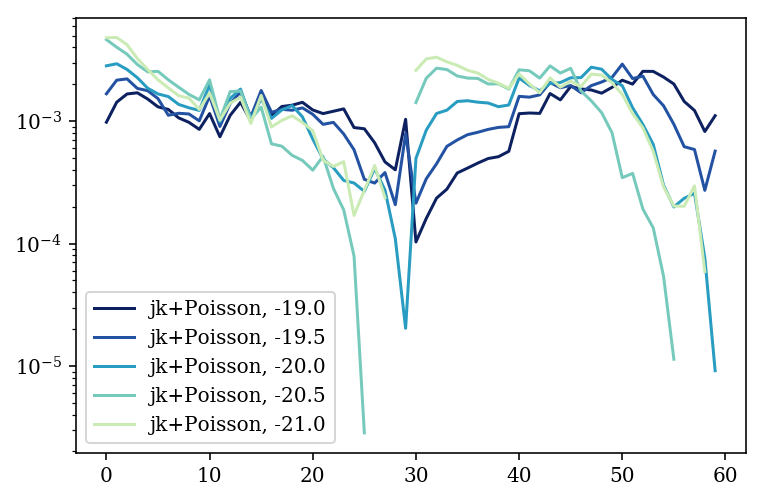

In [13]:
plt.plot(np.sqrt((jkcov19p0+realcov19p0).diagonal()[90:150]),label='jk+Poisson, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt((jkcov19p5+realcov19p5).diagonal()[90:150]),label='jk+Poisson, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt((jkcov20p0+realcov20p0).diagonal()[90:150]),label='jk+Poisson, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt((jkcov20p5+realcov20p5).diagonal()[90:150]),label='jk+Poisson, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt((jkcov21p0+realcov21p0).diagonal()[90:150]),label='jk+Poisson, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()

In [18]:
p19p0 = np.array((1.04029, 12.80315, 0.51193, 10.25010, 11.64354, 0., 0.))
p19p5 = np.array((1.11553, 13.06008, 0.44578, 11.29134, 11.75068, 0., 0.))
p20p0 = np.array((1.14385, 13.28584, 0.34846, 11.30750, 11.97186, 0., 0.))
p20p5 = np.array((1.19652, 13.59169, 0.18536, 11.20134, 12.25470, 0., 0.))
p21p0 = np.array((1.33738, 13.98811, 0.55950, 11.95797, 12.82356, 0., 0.))

[]

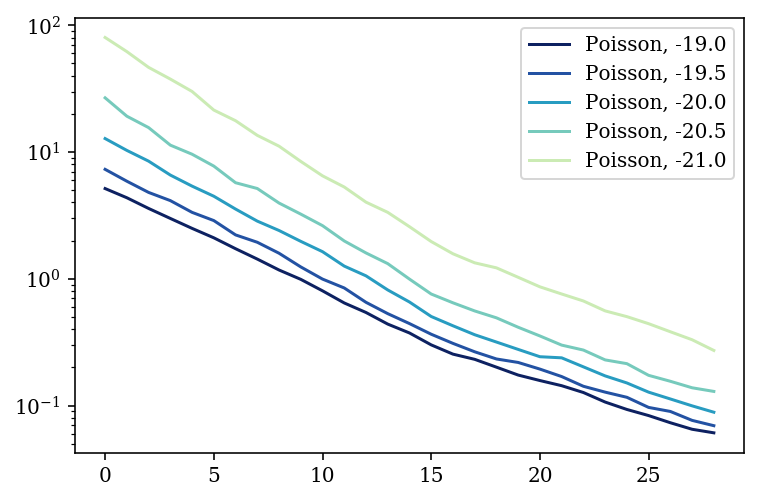

In [20]:
plt.plot(np.sqrt(realcov19p0.diagonal()[1:30]),label='Poisson, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt(realcov19p5.diagonal()[1:30]),label='Poisson, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt(realcov20p0.diagonal()[1:30]),label='Poisson, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt(realcov20p5.diagonal()[1:30]),label='Poisson, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt(realcov21p0.diagonal()[1:30]),label='Poisson, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()

[]

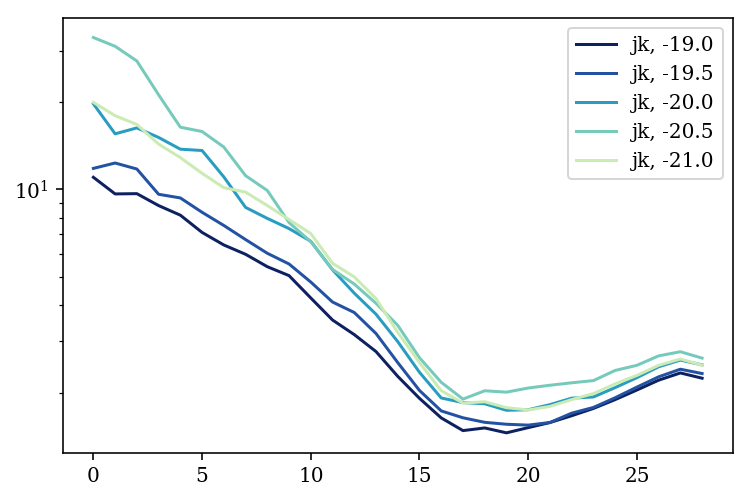

In [23]:
plt.plot(np.sqrt(jkcov19p0.diagonal()[1:30]),label='jk, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt(jkcov19p5.diagonal()[1:30]),label='jk, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt(jkcov20p0.diagonal()[1:30]),label='jk, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt(jkcov20p5.diagonal()[1:30]),label='jk, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt(jkcov21p0.diagonal()[1:30]),label='jk, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()

[]

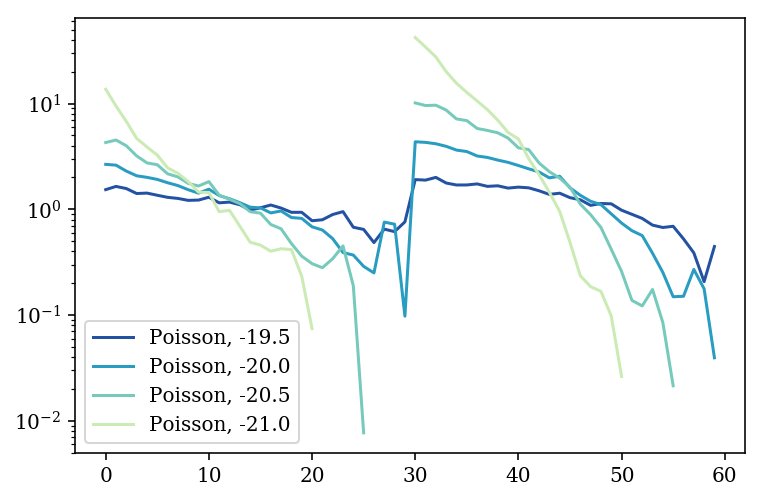

In [25]:
#plt.plot(np.sqrt(realcov19p0.diagonal()[90:150]),label='Poisson, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt(realcov19p5.diagonal()[90:150])/np.sqrt(realcov19p0.diagonal()[90:150]),label='Poisson, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt(realcov20p0.diagonal()[90:150])/np.sqrt(realcov19p0.diagonal()[90:150]),label='Poisson, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt(realcov20p5.diagonal()[90:150])/np.sqrt(realcov19p0.diagonal()[90:150]),label='Poisson, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt(realcov21p0.diagonal()[90:150])/np.sqrt(realcov19p0.diagonal()[90:150]),label='Poisson, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()

[]

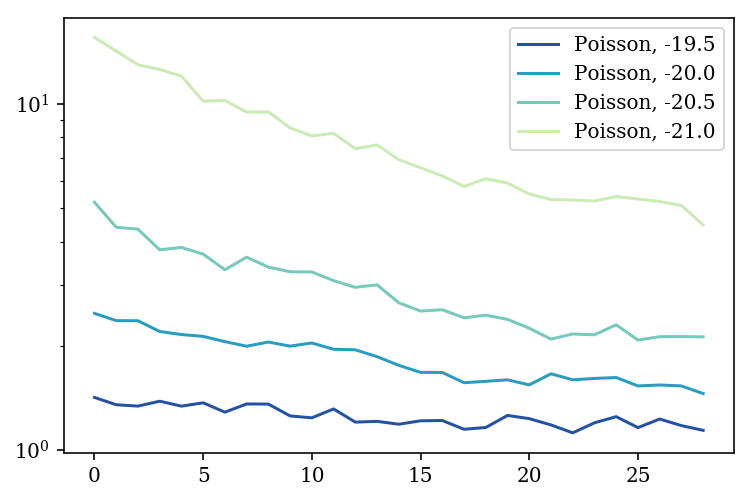

In [26]:
#plt.plot(np.sqrt(realcov19p0.diagonal()[90:150]),label='Poisson, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt(realcov19p5.diagonal()[1:30])/np.sqrt(realcov19p0.diagonal()[1:30]),label='Poisson, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt(realcov20p0.diagonal()[1:30])/np.sqrt(realcov19p0.diagonal()[1:30]),label='Poisson, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt(realcov20p5.diagonal()[1:30])/np.sqrt(realcov19p0.diagonal()[1:30]),label='Poisson, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt(realcov21p0.diagonal()[1:30])/np.sqrt(realcov19p0.diagonal()[1:30]),label='Poisson, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()

(0, 7)

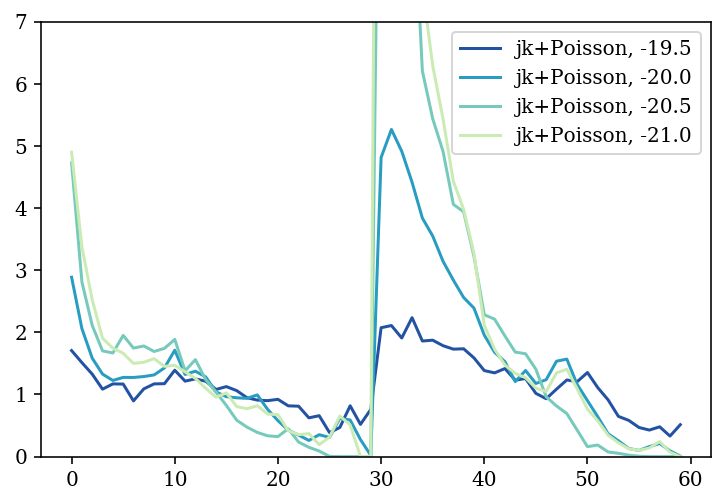

In [31]:
#plt.plot(np.sqrt((jkcov19p0+realcov19p0).diagonal()[90:150]),label='jk+Poisson, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt((jkcov19p5+realcov19p5).diagonal()[90:150])/np.sqrt((jkcov19p0+realcov19p0).diagonal()[90:150]),label='jk+Poisson, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt((jkcov20p0+realcov20p0).diagonal()[90:150])/np.sqrt((jkcov19p0+realcov19p0).diagonal()[90:150]),label='jk+Poisson, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt((jkcov20p5+realcov20p5).diagonal()[90:150])/np.sqrt((jkcov19p0+realcov19p0).diagonal()[90:150]),label='jk+Poisson, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt((jkcov21p0+realcov21p0).diagonal()[90:150])/np.sqrt((jkcov19p0+realcov19p0).diagonal()[90:150]),label='jk+Poisson, -21.0',c=cm.YlGnBu(60))
plt.legend()
#plt.semilogy()
plt.ylim(0,7)

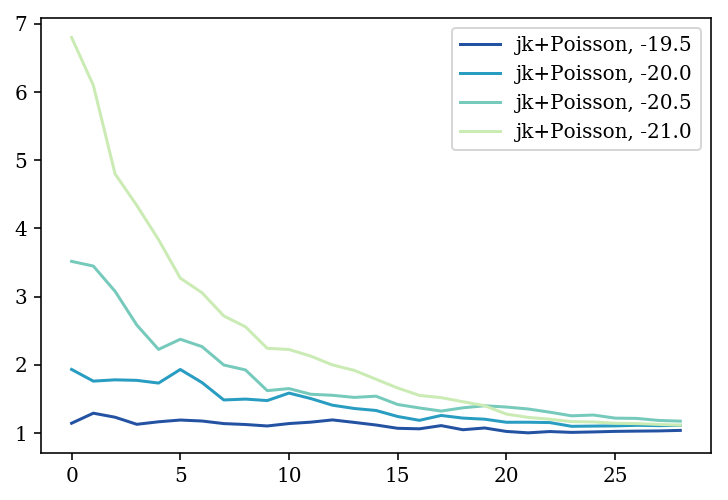

In [30]:
#plt.plot(np.sqrt((jkcov19p0+realcov19p0).diagonal()[90:150]),label='jk+Poisson, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt((jkcov19p5+realcov19p5).diagonal()[1:30])/np.sqrt((jkcov19p0+realcov19p0).diagonal()[1:30]),label='jk+Poisson, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt((jkcov20p0+realcov20p0).diagonal()[1:30])/np.sqrt((jkcov19p0+realcov19p0).diagonal()[1:30]),label='jk+Poisson, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt((jkcov20p5+realcov20p5).diagonal()[1:30])/np.sqrt((jkcov19p0+realcov19p0).diagonal()[1:30]),label='jk+Poisson, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt((jkcov21p0+realcov21p0).diagonal()[1:30])/np.sqrt((jkcov19p0+realcov19p0).diagonal()[1:30]),label='jk+Poisson, -21.0',c=cm.YlGnBu(60))
plt.legend()
#plt.semilogy()

/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':
/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app
/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()
/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide
/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


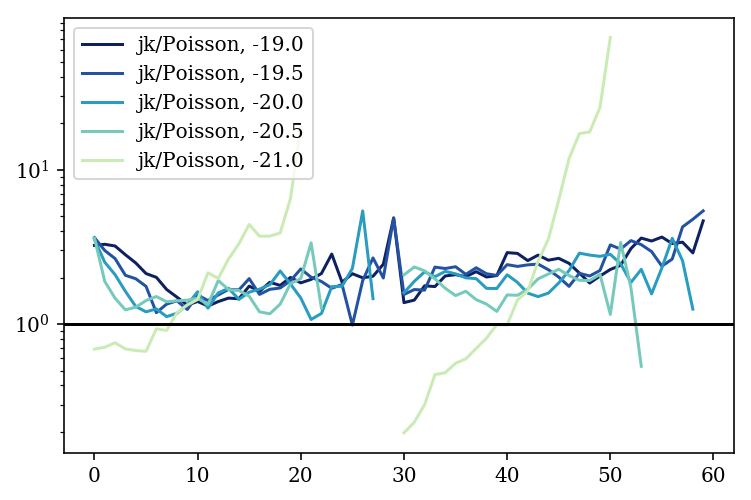

In [35]:
plt.plot(np.sqrt((jkcov19p0/realcov19p0).diagonal()[90:150]),label='jk/Poisson, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt((jkcov19p5/realcov19p5).diagonal()[90:150]),label='jk/Poisson, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt((jkcov20p0/realcov20p0).diagonal()[90:150]),label='jk/Poisson, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt((jkcov20p5/realcov20p5).diagonal()[90:150]),label='jk/Poisson, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt((jkcov21p0/realcov21p0).diagonal()[90:150]),label='jk/Poisson, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()
plt.axhline(1,color='k')